# Computer Vision with OpenCV

## Initial Setups 

OpenCV: OpenCV (Open Source Computer Vision Library) is a library of programming functions mainly aimed at real-time computer vision. OpenCV is written in C++ and its primary interface is in C++, however it has interface in other programming languages such as Python, Java and MATLAB.

https://opencv.org/

In [1]:
%pip install opencv-python 
import cv2
cv2.__version__

Note: you may need to restart the kernel to use updated packages.


'4.9.0'

In [8]:
#Required libraries
import numpy as np                    #for numerical computation
import matplotlib.pyplot as plt       #for data visualization

## Read and Display Images in OpenCV

In [11]:
#Read image
img = cv2.imread('sample_image_01.jpg')

In [12]:
type(img)

numpy.ndarray

In [13]:
#Display the image w/ OpenCV
cv2.imshow('Image', img)
cv2.waitKey(6000)
cv2.destroyWindow('Image')

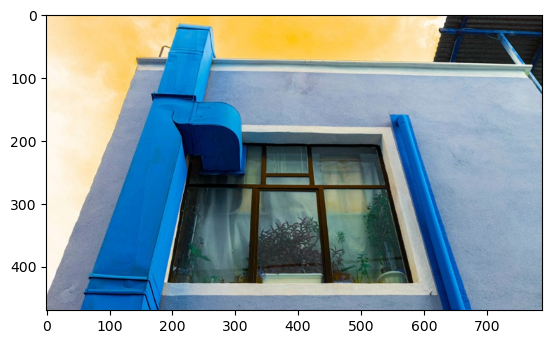

In [14]:
#Display the image with Matplotlib
plt.imshow(img)

#Note: OpenCV reads and displays an image as BGR format instead of RGB color format
#Note: In the above image note that x-axis points positive to 
#      the right and y-axis points positive downwards.

In [15]:
#Convert the image from BGR to RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

Text(0.5, 1.0, 'Original Image')

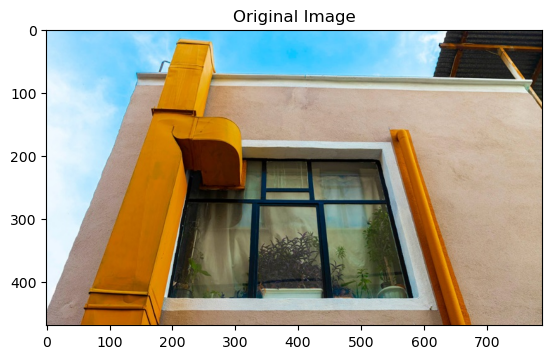

In [16]:
#Display the image with Matplotlib
plt.imshow(img_rgb)
plt.title('Original Image')

## Image Linear Transformations 

In [17]:
#Rotation
def get_rotation(theta):
    theta = np.radians(theta)
    return np.array([[np.cos(theta), -np.sin(theta), 0],
                     [np.sin(theta),  np.cos(theta), 0]], dtype = np.float32)
get_rotation(-45)

array([[ 0.70710677,  0.70710677,  0.        ],
       [-0.70710677,  0.70710677,  0.        ]], dtype=float32)

In [18]:
num_rows, num_cols = img_rgb.shape[:2]
img_rot = cv2.warpAffine(img_rgb, get_rotation(-10), (num_cols, num_rows))

Text(0.5, 1.0, 'Rotated Image')

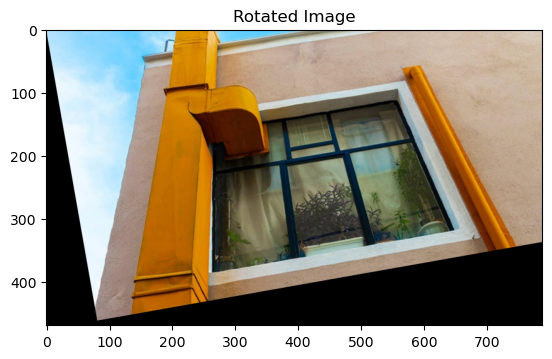

In [19]:
#Display the image with Matplotlib
plt.imshow(img_rot)
plt.title('Rotated Image')

In [20]:
#Scale
def get_scale(s):
    return np.array([[s, 0, 0],
                     [0, s, 0]], dtype = np.float32)
get_scale(2/3)

array([[0.6666667, 0.       , 0.       ],
       [0.       , 0.6666667, 0.       ]], dtype=float32)

In [21]:
img_scl = cv2.warpAffine(img_rgb, get_scale(2/3), (num_cols, num_rows))

Text(0.5, 1.0, 'Scaled Image')

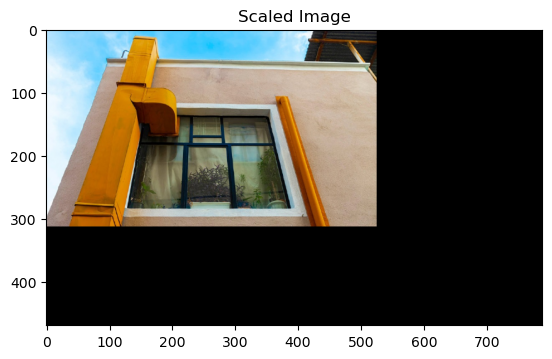

In [22]:
#Display the image with Matplotlib
plt.imshow(img_scl)
plt.title('Scaled Image')

In [23]:
#Translation
def get_translation(tx, ty):
    return np.array([[1, 0, tx],
                     [0, 1, ty]], dtype = np.float32)

get_translation(100, 50)

array([[  1.,   0., 100.],
       [  0.,   1.,  50.]], dtype=float32)

In [24]:
img_trnsl = cv2.warpAffine(img_rgb, get_translation(100, 50), (num_cols, num_rows))

Text(0.5, 1.0, 'Translated Image')

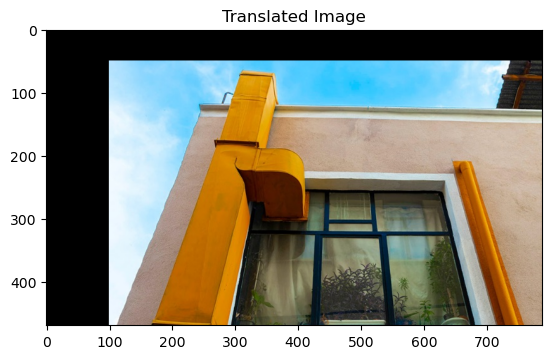

In [25]:
#Display the image with Matplotlib
plt.imshow(img_trnsl)
plt.title('Translated Image')

Text(0.5, 1.0, 'Translated Image with Padding')

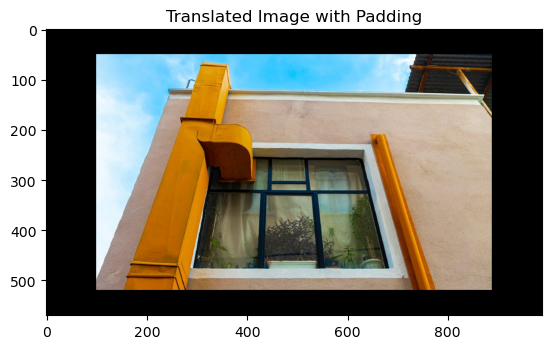

In [26]:
#Padding
img_padding = cv2.warpAffine(img_rgb, get_translation(100, 50), 
                             (num_cols + 2 * 100, num_rows + 2 * 50))

#Display the image with Matplotlib
plt.imshow(img_padding)
plt.title('Translated Image with Padding')

## Other Image Transformations

Text(0.5, 1.0, 'Image w/ Affine Transformation')

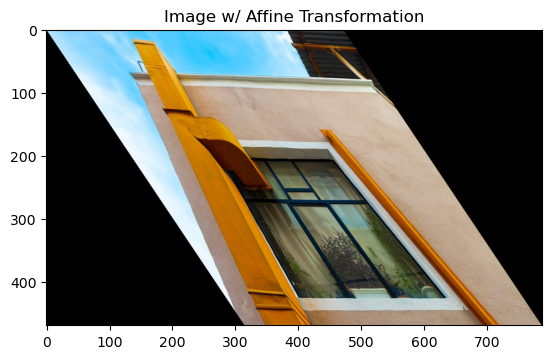

In [27]:
#Example 1 - Affine Transformation: it does not preserve length, and angle. However, it preserves parallelism.

src_points = np.array([[0, 0], 
                       [num_cols - 1, 0], 
                       [0, num_rows - 1]], dtype = np.float32)

dst_points = np.array([[0, 0], 
                       [int(0.6  * (num_cols - 1)),0], 
                       [int(0.4 * (num_cols - 1)), num_rows - 1]], dtype = np.float32)

affine_mat = cv2.getAffineTransform(src_points, dst_points)
img_output = cv2.warpAffine(img_rgb, affine_mat, (num_cols, num_rows))

#Display the image with Matplotlib
plt.imshow(img_output)
plt.title('Image w/ Affine Transformation')

Text(0.5, 1.0, 'Image w/ Projective Transformation')

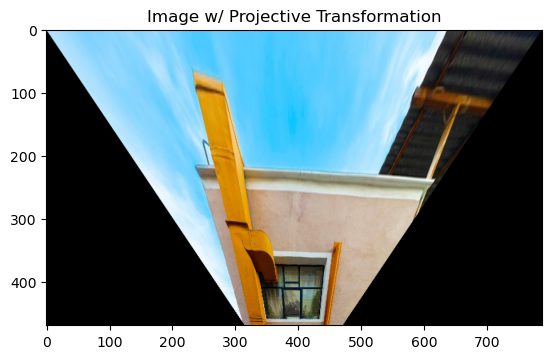

In [28]:
#Example 2 - Projective Transformation: it does not preserve parallelism, length, and angle.
#                                       But it still preserves collinearity and incidence (Axioms of Incidence Geometry).

src_points = np.array([[0, 0], 
                       [num_cols - 1, 0], 
                       [0, num_rows - 1],
                       [num_cols - 1, num_rows - 1]], dtype = np.float32)

dst_points = np.array([[0, 0],
                       [num_cols - 1, 0],
                       [int(0.4 * (num_cols - 1)), num_rows - 1], 
                       [int(0.6 * (num_cols - 1)), num_rows - 1]], dtype = np.float32)

projective_mat = cv2.getPerspectiveTransform(src_points, dst_points)
img_output = cv2.warpPerspective(img_rgb, projective_mat, (num_cols, num_rows))

#Display the image with Matplotlib
plt.imshow(img_output)
plt.title('Image w/ Projective Transformation')

## 2D Convolution

In [29]:
#Identifying horizental edges
kernel_h = np.array([[1, 1, 1], 
                     [0, 0, 0], 
                     [-1, -1, -1]], dtype = np.float32)
kernel_h

array([[ 1.,  1.,  1.],
       [ 0.,  0.,  0.],
       [-1., -1., -1.]], dtype=float32)

Text(0.5, 1.0, 'Horizental Edges')

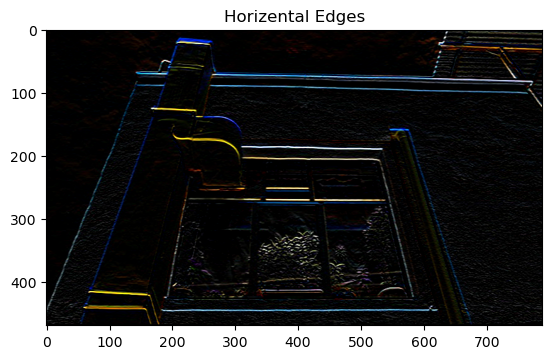

In [30]:
img_output = cv2.filter2D(src = img_rgb, ddepth = -1, kernel = kernel_h)

#Note: when ddepth = -1, the output image will have the same depth as the source.
#Note: depth is the number of bits used to represent color in the image it can be 8/24/32 bit 

#Display the image with Matplotlib
plt.imshow(img_output)
plt.title('Horizental Edges')

In [31]:
#Identifying vertical edges
kernel_v = np.array([[1, 0, -1], 
                     [1, 0, -1], 
                     [1, 0, -1]], dtype = np.float32)
kernel_v

array([[ 1.,  0., -1.],
       [ 1.,  0., -1.],
       [ 1.,  0., -1.]], dtype=float32)

Text(0.5, 1.0, 'Vertical Edges')

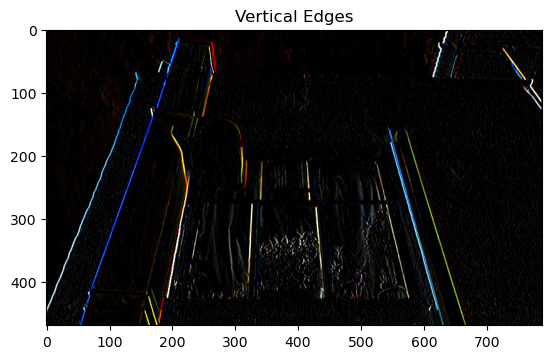

In [32]:
img_output = cv2.filter2D(img_rgb, -1, kernel_v)

#Display the image with Matplotlib
plt.imshow(img_output)
plt.title('Vertical Edges')

Text(0.5, 1.0, 'Blurred Image')

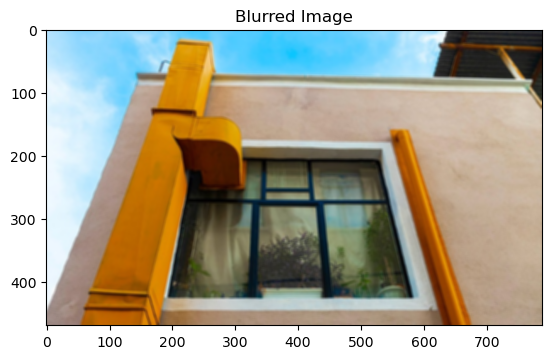

In [33]:
#Box Blurring
kernel_bb = 1 / (5 * 5) * np.ones((5, 5), dtype = np.float32)

img_output = cv2.filter2D(img_rgb, -1, kernel_bb)

#Display the image with Matplotlib
plt.imshow(img_output)
plt.title('Blurred Image')

Text(0.5, 1.0, 'Vignette Filter')

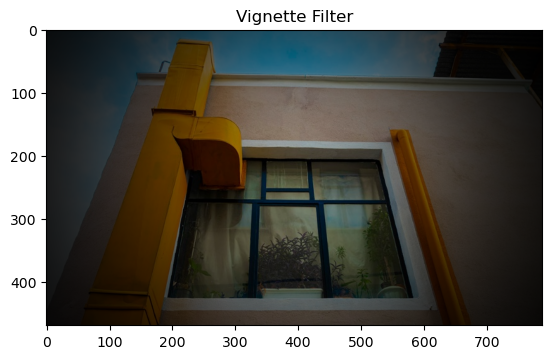

In [34]:
#Generate vignette mask using Gaussian kernels
kernel_x = cv2.getGaussianKernel(ksize = num_cols, sigma = 200)
kernel_y = cv2.getGaussianKernel(ksize = num_rows, sigma = 200)
kernel = kernel_y * kernel_x.T
mask = 255 * kernel / np.linalg.norm(kernel)
img_output = np.copy(img_rgb)

#Apply the filter to each channel in the input image
for i in range(3):
    img_output[:, :, i] = img_output[:, :, i] * mask

#Display the image with Matplotlib
plt.imshow(img_output)
plt.title('Vignette Filter')

In [35]:
kernel_x.shape

(789, 1)

In [36]:
kernel_x

array([[0.00030114],
       [0.00030412],
       [0.00030712],
       [0.00031014],
       [0.00031318],
       [0.00031624],
       [0.00031933],
       [0.00032244],
       [0.00032557],
       [0.00032872],
       [0.0003319 ],
       [0.00033509],
       [0.00033831],
       [0.00034156],
       [0.00034482],
       [0.00034811],
       [0.00035142],
       [0.00035475],
       [0.0003581 ],
       [0.00036148],
       [0.00036488],
       [0.00036831],
       [0.00037175],
       [0.00037522],
       [0.00037871],
       [0.00038223],
       [0.00038576],
       [0.00038932],
       [0.00039291],
       [0.00039651],
       [0.00040014],
       [0.0004038 ],
       [0.00040747],
       [0.00041117],
       [0.00041489],
       [0.00041864],
       [0.00042241],
       [0.0004262 ],
       [0.00043002],
       [0.00043386],
       [0.00043772],
       [0.0004416 ],
       [0.00044551],
       [0.00044944],
       [0.0004534 ],
       [0.00045738],
       [0.00046138],
       [0.000

In [37]:
kernel_y.shape

(470, 1)

In [38]:
kernel.shape

(470, 789)

In [39]:
mask

array([[0.05481336, 0.05535525, 0.05590109, ..., 0.05590109, 0.05535525,
        0.05481336],
       [0.05513496, 0.05568002, 0.05622907, ..., 0.05622907, 0.05568002,
        0.05513496],
       [0.05545706, 0.05600531, 0.05655756, ..., 0.05655756, 0.05600531,
        0.05545706],
       ...,
       [0.05545706, 0.05600531, 0.05655756, ..., 0.05655756, 0.05600531,
        0.05545706],
       [0.05513496, 0.05568002, 0.05622907, ..., 0.05622907, 0.05568002,
        0.05513496],
       [0.05481336, 0.05535525, 0.05590109, ..., 0.05590109, 0.05535525,
        0.05481336]])

## Image Segmentation

In [40]:
#Data preprocessing
two_dim_img = img_rgb.reshape((-1, 3))
two_dim_img = np.float32(two_dim_img)
two_dim_img.shape

(370830, 3)

In [41]:
two_dim_img

array([[183., 228., 255.],
       [182., 227., 255.],
       [182., 227., 255.],
       ...,
       [185., 164., 143.],
       [192., 171., 150.],
       [197., 176., 155.]], dtype=float32)

In [42]:
#The algorithm termination criteria
criteria = (cv2.TERM_CRITERIA_MAX_ITER + cv2.TERM_CRITERIA_EPS, 100, 0.2)
#Note: use max # of iterations and min movement of center of clusters as criteria

#The Number of clusters 
K = 3

#The Number of times the algorithm is executed
attempts = 10

#Run k-means clustering
ret, label, center = cv2.kmeans(data = two_dim_img, K = K, bestLabels = None, 
                                criteria = criteria, attempts = attempts, flags = cv2.KMEANS_RANDOM_CENTERS)

#KMEANS_PP_CENTERS: uses kmeans++ center initialization

#Convert back to 8 bit pixel values
center = np.uint8(center)

#Flatten the labels array
res = center[label.flatten()]
img_output = res.reshape((img_rgb.shape))

In [43]:
#Total within sum of squares
ret

1545693921.5346045

In [44]:
#Center of clusters
center

array([[164, 221, 246],
       [182, 164, 142],
       [108,  76,  28]], dtype=uint8)

In [45]:
label

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]], dtype=int32)

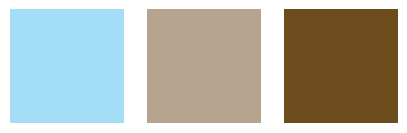

In [46]:
#Simple Grids of Subplots
plt.figure(figsize = (5, 5))
for i in range(center.shape[0]):
    plt.subplot(1, 3, i + 1)
    plt.imshow([[center[i]]])
    plt.axis('off')

In [47]:
np.unique(label)

array([0, 1, 2], dtype=int32)

Text(0.5, 1.0, 'K-menas Clustering - K = 3')

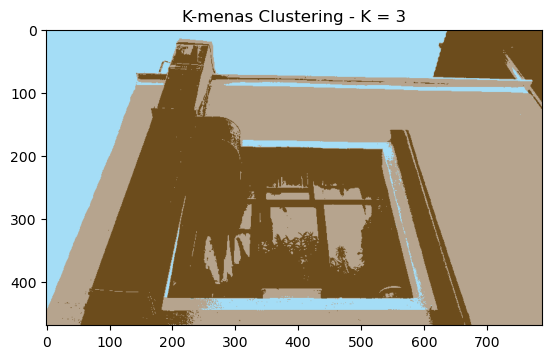

In [48]:
#Display the image with Matplotlib
plt.imshow(img_output)
plt.title('K-menas Clustering - K = 3')

In [49]:
#The Number of clusters 
K = 5

#The Number of times the algorithm is executed
attempts = 10

#Run k-means clustering
ret, label, center = cv2.kmeans(two_dim_img, K, None, 
                                criteria, attempts, cv2.KMEANS_RANDOM_CENTERS)

#Convert back to 8 bit pixel values
center = np.uint8(center)

#Flatten the labels array
res = center[label.flatten()]
img_output = res.reshape((img_rgb.shape))

In [50]:
#Center of clusters
center

array([[179, 162, 142],
       [107, 208, 253],
       [191, 113,   5],
       [204, 228, 239],
       [ 57,  52,  38]], dtype=uint8)

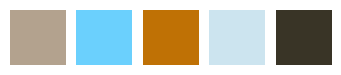

In [51]:
#Simple Grids of Subplots
plt.figure(figsize = (5, 5))
for i in range(center.shape[0]):
    plt.subplot(1, 6, i + 1)
    plt.imshow([[center[i]]])
    plt.axis('off')

Text(0.5, 1.0, 'K-menas Clustering - K = 5')

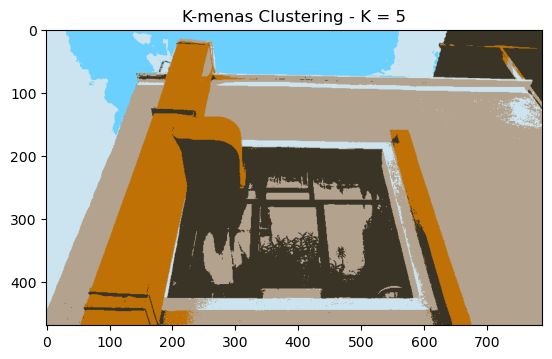

In [52]:
#Display the image with Matplotlib
plt.imshow(img_output)
plt.title('K-menas Clustering - K = 5')

## Work with Live Video Stream

### Access to the Webcam

In [ ]:
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    frame = cv2.resize(frame, None, fx = 0.75, fy = 0.75) #or cv2.resize(frame, (500, 250))
    cv2.imshow('Webcam', frame)
    c = cv2.waitKey(1) #Display a frame for 1 ms
    if c == 27:        #Press the Esc key to exit
        break

cap.release() #Free the webcam resource so that another application can make use of it.
cv2.destroyAllWindows() #Close camera window

### Interacting with a Live Video Stream

In [ ]:
def update_corners(event_params, x, y):
    global x_init, y_init
    event_params['first_corner']    = (min(x_init, x), min(y_init, y))
    event_params['opposite_corner'] = (max(x_init, x), max(y_init, y))

In [ ]:
def draw_rectangle(event, x, y, flags, event_params):
    global x_init, y_init, drawing
    
    #First click initialize the first corner of rectangle
    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        x_init, y_init = x, y
    
    #Meanwhile mouse button is pressed, update opposite corner of rectangle
    elif event == cv2.EVENT_MOUSEMOVE and drawing:
        update_corners(event_params, x, y)
    
    #Once mouse botton is release
    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        update_corners(event_params, x, y)

In [ ]:
drawing = False
event_params = {'first_corner': (-1, -1), 'opposite_corner': (-1, -1)}

#Bind draw_rectangle function to every mouse event
cap = cv2.VideoCapture(0)
cv2.namedWindow('Webcam')
cv2.setMouseCallback('Webcam', draw_rectangle, event_params)
#Note: set the function draw_rectangle as a response to any event received from mouse on the OpenCV window "Webcam"

while True:
    ret, frame = cap.read()
    img = cv2.resize(frame, None, fx = 0.75, fy = 0.75)
    
    (x0, y0), (x1, y1) = event_params['first_corner'], event_params['opposite_corner']
    
    #Apply the desired effect
    img[y0 : y1, x0 : x1] = 255 - img[y0 : y1, x0 : x1] #Note: -1 is the same as 255, -2 is 254, etc.
    
    cv2.imshow('Webcam', img)
    c = cv2.waitKey(1)
    if c == 27:
        break

cap.release()
cv2.destroyAllWindows()

In [ ]:
#How does it work?
cap = cv2.VideoCapture(0)
cv2.namedWindow('Webcam')
cv2.setMouseCallback('Webcam', draw_rectangle, event_params)

while True:
    ret, frame = cap.read()
    img = cv2.resize(frame, None, fx = 0.75, fy = 0.75)
    
    print(event_params)
    
    cv2.imshow('Webcam', img)
    c = cv2.waitKey(1)
    if c == 27:
        break

cap.release()
cv2.destroyAllWindows()

### Cartoonize the Image

In [ ]:
def cartoonize_image(img, ksize = 5):
    
    #Black and white cartoon--------------------------
    #Convert image to grayscale
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    #Apply median filter to the grayscale image
    img_gray = cv2.medianBlur(img_gray, ksize = ksize)
    
    #Detect edges in the image and threshold it
    edges = cv2.Laplacian(img_gray, ddepth = cv2.CV_8U, ksize = ksize)
    ret, mask = cv2.threshold(src = edges, thresh = 100, maxval = 255, type = cv2.THRESH_BINARY_INV)
    #Note: pixel values less than thresh are set to the output value (the third argument = maxval)
    #Note: mask is the sketch of the image
    
    return cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)

In [ ]:
cap = cv2.VideoCapture(0)
current_mode = None #Current unicode

while True:
    ret, frame = cap.read()
    frame = cv2.resize(frame, None, fx = 0.75, fy = 0.75)
    
    c = cv2.waitKey(1)
    if c == 27:
        break
    
    if c != -1 and c != current_mode:
        current_mode = c
    
    if current_mode == ord('c'):           #Cartoonize the image: press 'c'
        #Note: ord() returns the Unicode from a given character
        cv2.imshow('Cartoonized Image', cartoonize_image(frame, ksize = 5))
    
    else:
        cv2.imshow('Cartoonized Image', frame)
    
cap.release()
cv2.destroyAllWindows()

## Object Detection & Recognition

You only look once (YOLO) is a state-of-the-art, real-time object detection system:


https://pjreddie.com/darknet/yolo/

### Image File

In [ ]:
#Read image
img = cv2.imread('sample_image_02.jpg')

In [ ]:
#Display the image w/ OpenCV
cv2.imshow('Image', img)
cv2.waitKey(6000)
cv2.destroyWindow('Image')

In [54]:
with open('coco_names.txt') as file:
    labels = file.read().split('\n')    

In [55]:
labels

['person',
 'bicycle',
 'car',
 'motorbike',
 'aeroplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 'backpack',
 'umbrella',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'sofa',
 'pottedplant',
 'bed',
 'diningtable',
 'toilet',
 'tvmonitor',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'sink',
 'refrigerator',
 'book',
 'clock',
 'vase',
 'scissors',
 'teddy bear',
 'hair drier',
 'toothbrush']

In [56]:
len(labels)

80

In [57]:
model = cv2.dnn.readNet('yolov3.cfg', 'yolov3.weights')

In [58]:
#CNN input size
net_wh = 416

In [59]:
#Preprocess image
processed_img = cv2.dnn.blobFromImage(img, 1 / 255, (net_wh, net_wh), mean = [0, 0, 0], swapRB = True, crop = False)

In [60]:
processed_img.shape

(1, 3, 416, 416)

In [61]:
#Input image to model
model.setInput(processed_img)

In [62]:
#Extract networl's layer names
layer_names = model.getLayerNames()

In [63]:
model.getUnconnectedOutLayers()

array([200, 227, 254])

In [64]:
output_names = [layer_names[i - 1] for i in model.getUnconnectedOutLayers()]

In [65]:
output_names

['yolo_82', 'yolo_94', 'yolo_106']

In [66]:
outputs = model.forward(output_names)

In [67]:
len(outputs)

3

In [68]:
type(outputs)

tuple

In [69]:
outputs[0].shape, outputs[1].shape, outputs[2].shape

((507, 85), (2028, 85), (8112, 85))

In [70]:
outputs[0][0]
#it returns the x and y coordinates of the centre of the object detected, 
#  height and width of the bounding box, 
#  confidence and scores for all the classes of objects listed in coco-names.

array([3.9242819e-02, 4.4833191e-02, 3.9371660e-01, 1.4140454e-01,
       1.6088334e-08, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e

In [71]:
np.argmax(outputs[0][8][5:])

0

In [72]:
def obj_detection(outputs, img, obj_threshold = 0.4):
    input_h, input_w, _ = img.shape
    boxes = []
    label_ids = []
    confs = []
    
    for output in outputs:
        for row in output:
            probs = row[5: ]
            label_id = np.argmax(probs)
            confidence = probs[label_id]
            if confidence > obj_threshold:
                
                #width and height of detection box
                w, h = int(row[2] * input_w), int(row[3] * input_h)
                
                #center of detection box
                cx, cy = int(row[0] * input_w), int(row[1] * input_h)
                
                #x and y of left upper corner of detection box
                x, y = int(cx - w / 2), int(cy - h / 2)
                
                #Append box
                boxes.append([cx, cy, w, h])
                
                #Append label id
                label_ids.append(label_id)
                
                #Append confidence
                confs.append(np.round(confidence, decimals = 4))
    
    return(boxes, label_ids, confs)

In [73]:
obj_detection(outputs, img, obj_threshold = 0.4)

([[207, 186, 297, 334],
  [252, 186, 193, 319],
  [240, 187, 223, 318],
  [263, 186, 194, 326],
  [266, 186, 233, 320]],
 [15, 15, 15, 15, 15],
 [0.6234, 0.9006, 0.9033, 0.616, 0.4397])

In [74]:
labels[15]

'cat'

In [75]:
cv2.dnn.NMSBoxes(obj_detection(outputs, img)[0], obj_detection(outputs, img)[2], 0.4, 0.8)

array([2, 0, 4])

In [76]:
#Complete object detection function
def obj_detection(outputs, img, obj_threshold = 0.4, nms_threshold = 0.8):
    input_h, input_w, _ = img.shape
    boxes = []
    label_ids = []
    confs = []
    
    for output in outputs:
        for row in output:
            probs = row[5: ]
            label_id = np.argmax(probs)
            confidence = probs[label_id]
            if confidence > obj_threshold:
                
                #width and height of detection box
                w, h = int(row[2] * input_w), int(row[3] * input_h)
                
                #center of detection box
                cx, cy = int(row[0] * input_w), int(row[1] * input_h)
                
                #x and y of left upper corner of detection box
                x, y = int(cx - w / 2), int(cy - h / 2)
                
                #Append box
                boxes.append([x, y, w, h])
                
                #Append label id
                label_ids.append(label_id)
                
                #Append confidence
                confs.append(np.round(confidence, decimals = 4))
    
    indices = cv2.dnn.NMSBoxes(boxes, confs, obj_threshold, nms_threshold)
    for i in indices:
        box = boxes[i]
        x, y, w, h = box[0], box[1], box[2], box[3]
        cv2.rectangle(img, (x, y), (x + w, y + h), (178, 255, 102), 1)
        cv2.putText(img, f'{labels[label_ids[i]].upper()}{": "}{confs[i] * 100}{"%"}',
                    (x, y - 5), cv2.FONT_HERSHEY_PLAIN, 1, (178, 255, 102), 2)
        print(labels[label_ids[i]].upper() + ": " + "{0:.2f}".format(confs[i] * 100) + "%")

In [77]:
obj_detection(outputs, img, obj_threshold = 0.4, nms_threshold = 0.8)

CAT: 90.33%
CAT: 62.34%
CAT: 61.60%


In [78]:
#Display the image w/ OpenCV
cv2.imshow('Image', img)
cv2.waitKey(6000)
cv2.destroyWindow('Image')

In [79]:
#Read image
img = cv2.imread('sample_image_03.jpg')

#Preprocess image
processed_img = cv2.dnn.blobFromImage(img, 
                                      scalefactor = 1 / 255, 
                                      size = (net_wh, net_wh), 
                                      mean = [0, 0, 0], 
                                      swapRB = True, crop = False)

#Run prediction
model.setInput(processed_img)
output_names = [layer_names[i - 1] for i in model.getUnconnectedOutLayers()]
outputs = model.forward(output_names)
obj_detection(outputs, img, obj_threshold = 0.4, nms_threshold = 0.8)

#Display the image w/ OpenCV
cv2.imshow('Image', img)
cv2.waitKey(6000)
cv2.destroyWindow('Image')

HORSE: 99.82%
PERSON: 99.38%
PERSON: 62.42%
PERSON: 60.17%


In [80]:
#Read image
img = cv2.imread('sample_image_04.jpg')

#Preprocess image
processed_img = cv2.dnn.blobFromImage(img, 
                                      scalefactor = 1 / 255, 
                                      size = (net_wh, net_wh), 
                                      mean = [0, 0, 0], 
                                      swapRB = True, crop = False)

#Run prediction
model.setInput(processed_img)
output_names = [layer_names[i - 1] for i in model.getUnconnectedOutLayers()]
outputs = model.forward(output_names)
obj_detection(outputs, img, obj_threshold = 0.4, nms_threshold = 0.8)

#Display the image w/ OpenCV
cv2.imshow('Image', img)
cv2.waitKey(6000)
cv2.destroyWindow('Image')

MOTORBIKE: 99.69%
PERSON: 98.50%
MOTORBIKE: 98.26%
PERSON: 88.24%
PERSON: 68.25%
PERSON: 53.27%


### Webcam Feed

In [81]:
#Load Tiny Yolov3
model = cv2.dnn.readNet('yolov3-tiny.cfg', 'yolov3-tiny.weights')

#CNN input size
net_wh = 320

obj_threshold = 0.2
nms_threshold = 0.8

cap = cv2.VideoCapture(0)
while True:
    #Input frame
    ret, frame = cap.read()
    
    #Preprocess each frame
    processed_img = cv2.dnn.blobFromImage(frame, 1 / 255, (net_wh, net_wh), [0, 0, 0], 1, crop = False)
        
    #Run the prediction
    model.setInput(processed_img)
    layer_names = model.getLayerNames()
    output_names = [layer_names[i - 1] for i in model.getUnconnectedOutLayers()]
    outputs = model.forward(output_names)
    
    #Object detection
    obj_detection(outputs, frame, obj_threshold, nms_threshold)
    
    cv2.imshow('Camera', frame)
    
    c = cv2.waitKey(1)
    if c == 27:
        break
cap.release()
cv2.destroyAllWindows()

PERSON: 71.95%
PERSON: 73.51%
PERSON: 75.21%
PERSON: 71.91%
PERSON: 73.95%
PERSON: 72.09%
PERSON: 76.95%
PERSON: 79.09%
PERSON: 72.86%
PERSON: 74.16%
PERSON: 78.55%
PERSON: 75.99%
PERSON: 76.55%
PERSON: 82.07%
PERSON: 80.03%
PERSON: 76.84%
PERSON: 76.53%
PERSON: 76.62%
PERSON: 77.07%
PERSON: 84.82%
PERSON: 87.94%
PERSON: 86.00%
PERSON: 84.96%
PERSON: 81.84%
PERSON: 86.53%
PERSON: 85.76%
PERSON: 87.57%
PERSON: 82.13%
PERSON: 80.77%
PERSON: 76.61%
PERSON: 75.31%
PERSON: 76.22%
PERSON: 75.07%
PERSON: 68.30%
PERSON: 65.60%
PERSON: 65.55%
PERSON: 58.60%
PERSON: 55.79%
PERSON: 50.20%
PERSON: 48.51%
PERSON: 50.38%
PERSON: 50.81%
PERSON: 50.23%
PERSON: 50.04%
PERSON: 51.60%
PERSON: 53.81%
PERSON: 44.71%
PERSON: 50.51%
PERSON: 54.29%
PERSON: 56.46%
PERSON: 59.16%
PERSON: 68.69%
PERSON: 57.60%
PERSON: 20.37%
PERSON: 65.25%
PERSON: 69.90%
PERSON: 61.45%
PERSON: 58.27%
PERSON: 60.62%
PERSON: 57.01%
PERSON: 65.11%
PERSON: 67.27%
PERSON: 71.69%
PERSON: 70.94%
PERSON: 73.54%
PERSON: 76.57%
PERSON: 73

### Video File

In [82]:
#Load Tiny Yolov3
model = cv2.dnn.readNet('yolov3-tiny.cfg', 'yolov3-tiny.weights')

#CNN input size
net_wh = 320

obj_threshold = 0.3
nms_threshold = 0.6

cap = cv2.VideoCapture('sample_video.mp4')
while True:
    #Input frame
    ret, frame = cap.read()
    
    #Preprocess each frame
    processed_img = cv2.dnn.blobFromImage(frame, 1 / 255, (net_wh, net_wh), [0, 0, 0], 1, crop = False)
        
    #Run the prediction
    model.setInput(processed_img)
    layer_names = model.getLayerNames()
    output_names = [layer_names[i - 1] for i in model.getUnconnectedOutLayers()]
    outputs = model.forward(output_names)
    
    #Object detection
    obj_detection(outputs, frame, obj_threshold, nms_threshold)
    
    cv2.imshow('Camera', frame)
    
    c = cv2.waitKey(1)
    if c == 27:
        break
cap.release()
cv2.destroyAllWindows()

CAR: 42.16%
CAR: 39.62%
CAR: 34.27%
CAR: 41.39%
CAR: 31.44%
CAR: 64.50%
CAR: 42.16%
CAR: 48.31%
CAR: 32.97%
CAR: 58.30%
CAR: 54.64%
CAR: 67.54%
CAR: 59.59%
CAR: 51.02%
CAR: 49.79%
CAR: 43.08%
CAR: 30.11%
CAR: 34.90%
CAR: 31.55%
CAR: 31.08%
CAR: 40.42%
CAR: 34.34%
CAR: 47.81%
CAR: 38.24%
CAR: 33.21%
CAR: 44.91%
CAR: 32.53%
CAR: 30.70%
CAR: 59.79%
CAR: 49.54%
CAR: 32.44%
CAR: 31.97%
CAR: 59.95%
CAR: 47.27%
PERSON: 33.42%
CAR: 40.24%
PERSON: 38.58%
CAR: 75.44%
CAR: 52.55%
CAR: 34.65%
CAR: 30.11%
CAR: 84.63%
CAR: 59.88%
CAR: 39.66%
CAR: 36.65%
CAR: 60.98%
CAR: 41.50%
CAR: 66.27%
CAR: 62.10%
CAR: 49.34%
CAR: 35.32%
PERSON: 33.59%
PERSON: 30.51%
CAR: 74.00%
CAR: 72.79%
CAR: 64.77%
CAR: 76.85%
CAR: 76.22%
CAR: 65.53%
CAR: 84.49%
CAR: 83.79%
CAR: 73.02%
CAR: 84.39%
CAR: 83.72%
CAR: 62.18%
CAR: 77.83%
CAR: 59.67%
CAR: 45.94%
CAR: 77.45%
CAR: 77.15%
CAR: 57.19%
CAR: 36.64%
CAR: 81.02%
CAR: 62.95%
CAR: 56.79%
CAR: 81.52%
CAR: 61.00%
CAR: 58.91%
CAR: 39.57%
CAR: 82.36%
CAR: 76.45%
CAR: 66.85%
CAR: